# Аналитика в интернет-магазине. A/B тесты. 

**Принятие решений в бизнесе на основе данных**

**Описание проекта**
Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки. Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

**Ход исследования**

Изучим 3 файла: `hypothesis.csv`, `orders.csv`, `visitors.csv`

О качестве данных ничего не известно. Поэтому понадобится обзор данных.

Далее проведём приоритезацию гипотез и анализ А/В теста.

Таким образом, исследование будет состоять из 3 частей:

1. Обзор данных.
2. Приоритезация гипотез.
3. Анализ А/В теста.

## Шаг 1. Обзор данных.

Загрузим данные о гипотезах, заказах и визитах. Исправим регистр, тип данных в каждой колонке, пропуски и дубликаты при необходимости. 

Путь к файлам:

 -   /datasets/hypothesis.csv 
 -   /datasets/orders.csv
 -   /datasets/visitors.csv

In [1]:
#импортируем необходимые для работы библиотеки:

import pandas as pd
import numpy as np
import datetime as dt
import math


import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import seaborn as sns
sns.set(rc={'figure.figsize':(10, 8)})

import scipy.stats as stats
from scipy import stats as st

import warnings
warnings.filterwarnings("ignore")

In [2]:
#для удобства отобразим все колонки таблицы и приведем данные к формату двух знаков после запятой:

pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', 1)
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
#прочитаем таблицы:

hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

**Посмотрим на таблицы**

### Таблица hypothesis:

In [4]:
#начнём с таблицы hypothesis:

hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


В файле `hypothesis.csv` 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

In [5]:
#приведем названия стобцов к нижнем регистру:

hypothesis.columns = hypothesis.columns.str.lower()

In [6]:
#посмотрим информацию о датафрейме:

hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


С таблицей hypothesis все в порядке.

### Таблица orders:

In [7]:
#посмотрим на таблицу orders:

orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

In [8]:
#приведем названия стобцов к нижнем регистру:

orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']

In [9]:
#посмотрим информацию о датафрейме:

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  1197 non-null   int64 
 1   visitor_id      1197 non-null   int64 
 2   date            1197 non-null   object
 3   revenue         1197 non-null   int64 
 4   group           1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [11]:
orders['visitor_id'].nunique()

1031

In [12]:
# Посмотрим распределение численных значений колонки revenue:

orders['revenue'].describe()

count   1,197.00    
mean    8,348.01    
std     39,191.13   
min     50.00       
25%     1,220.00    
50%     2,978.00    
75%     8,290.00    
max     1,294,500.00
Name: revenue, dtype: float64

In [13]:
#в таблице orders неверный тип данных в столбце с датами, приведем его к нужному типу:

orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [14]:
#проверим на дубликаты:

orders.duplicated().sum()

0

### Таблица visitors:

In [15]:
#посмотрим на таблицу visitors:

visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

In [16]:
#посмотрим информацию о датафрейме:

visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [17]:
#в таблице visitors неверный тип данных в столбце с датами, приведем его к нужному типу:

visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [18]:
#проверим, что нет "лишних" групп и распределение по группам

visitors['group'].value_counts()

A    31
B    31
Name: group, dtype: int64

In [19]:
#проверим, есть ли значения, которые встречаются в обеих группах:

len(np.intersect1d(orders.query('group == "A"')['visitor_id'].unique(), orders.query('group == "B"')['visitor_id'].unique()))

58

В данных есть 58 значений, встречающихся в обеих группах. 58 значений от 1031 пользователей — допустимо, но мы удалим их, чтобы не было дополнительных искажений при проведении тестирования.

In [20]:
#посмотрим на id тех, кто попал в обе группы:

list_id = np.intersect1d(orders.query('group == "A"')['visitor_id'].unique(), 
                         orders.query('group == "B"')['visitor_id'].unique())
list_id

array([   8300375,  199603092,  232979603,  237748145,  276558944,
        351125977,  393266494,  457167155,  471551937,  477780734,
        818047933,  963407295, 1230306981, 1294878855, 1316129916,
       1333886533, 1404934699, 1602967004, 1614305549, 1648269707,
       1668030113, 1738359350, 1801183820, 1959144690, 2038680547,
       2044997962, 2378935119, 2458001652, 2579882178, 2587333274,
       2600415354, 2654030115, 2686716486, 2712142231, 2716752286,
       2780786433, 2927087541, 2949041841, 2954449915, 3062433592,
       3202540741, 3234906277, 3656415546, 3717692402, 3766097110,
       3803269165, 3891541246, 3941795274, 3951559397, 3957174400,
       3963646447, 3972127743, 3984495233, 4069496402, 4120364173,
       4186807279, 4256040402, 4266935830])

In [21]:
#переведем массив в список:

list_id = list_id.tolist()

In [22]:
orders = orders[~orders.visitor_id.isin(list_id)]

In [23]:
#снова проверим, есть ли значения, которые встречаются в обеих группах:

len(np.intersect1d(orders.query('group == "A"')['visitor_id'].unique(), orders.query('group == "B"')['visitor_id'].unique()))

0

**Вывод по таблицам**

В двух таблицах были неверные типы данных в столбцах со временем. Мы привели их к нужному типу. Дубликаты и пропуски не обнаружены. Очистили данные от значений, повторяющихся в обеих группах. Данные готовы к дальнейшему исследованию

## Шаг 2. Приоритизация гипотез.

Задачи:
- Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

### Фреймворк ICE 

In [24]:
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

In [25]:
hypothesis.sort_values('ICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


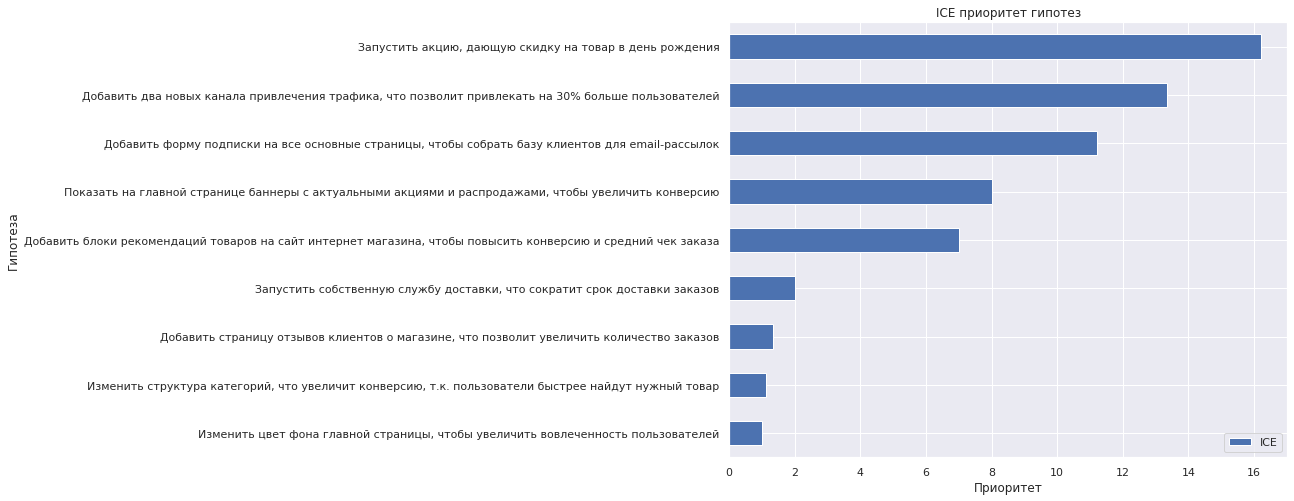

In [26]:
ax = hypothesis[['hypothesis', 'ICE']].set_index('hypothesis').sort_values('ICE', ascending=True).plot(kind='barh')
ax.set_xlabel('Приоритет')
ax.set_ylabel('Гипотеза')
ax.set_title('ICE приоритет гипотез')
plt.show()

Как мы видим, наиболее приоритетной является гипотеза номер 8 - **Запустить акцию, дающую скидку на товар** в день рождения. 

На втором месте стоит гипотеза 0 - **Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей**.

За ней следует гипотеза 7 - **Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок**.

### Фреймворк RICE

In [27]:
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

In [28]:
hypothesis.sort_values('RICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.00


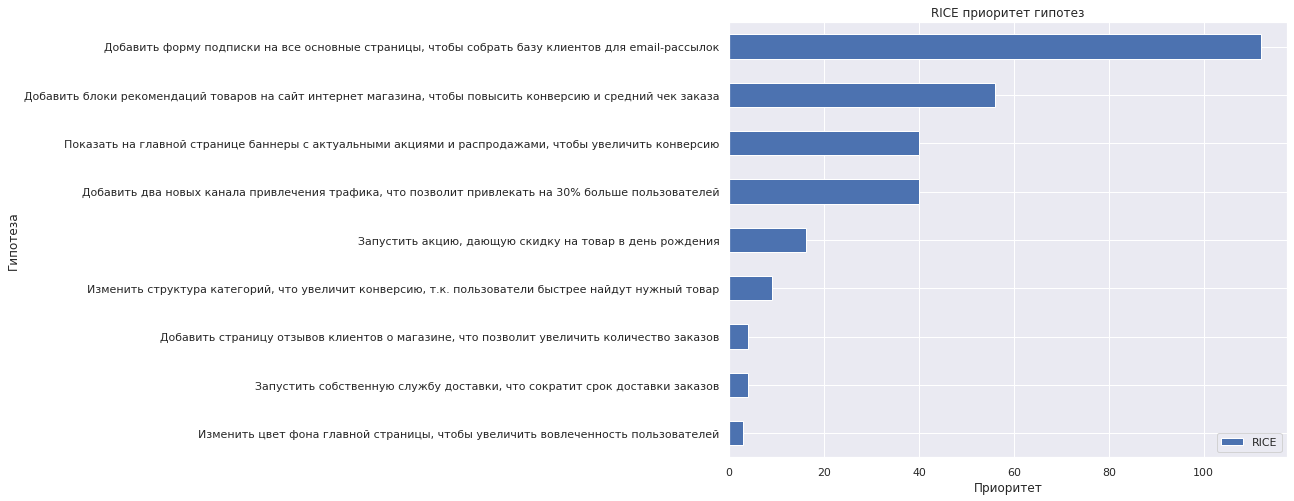

In [29]:
ax = hypothesis[['hypothesis', 'RICE']].set_index('hypothesis').sort_values('RICE', ascending=True).plot(kind='barh')
ax.set_xlabel('Приоритет')
ax.set_ylabel('Гипотеза')
ax.set_title('RICE приоритет гипотез')
plt.show()

Тут мы видим совершенно другую картину. Гипотеза 9, которая была в топе в ICE находится аж на 5 месте.

### Приоритизация гипотез при применении RICE и ICE

Помотрим как изменилась приоритизация гипотез при применении RICE вместо ICE и объясним, почему так произошло.

In [32]:
i = hypothesis['ICE'].sort_values(ascending = False).reset_index()['index']
r = hypothesis['RICE'].sort_values(ascending = False).reset_index()['index']
pd.concat([i, r], axis = 1)

,index,index
0,8,7
1,0,2
2,7,0
3,6,6
4,2,8
5,1,3
6,5,1
7,3,5
8,4,4


In [33]:
hypothesis[['hypothesis', 'ICE', 'RICE']].style.background_gradient(cmap='Blues')

,hypothesis,ICE,RICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333,40.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000,4.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000,56.000000
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000,9.000000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000,3.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333,4.000000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000,40.000000
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000,112.000000
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000,16.200000


**Вывод**

Результаты преоритизации ICE и RICE сильно отличаются друг от друга. Так происходит потому, что что формулы разные - одна учитывает охват, а другая нет.

## Анализ A/B-теста

Проанализируем A/B-тест. Перед нами стоят следующие задачи:
1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
4. Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.
5. Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.
6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
10. Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
12. Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
14. Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

**Соберем все коммулятивные данные.** Объединим таблицы и добавим в новую таблицу: дату, группу A/B-теста, число уникальных заказов в группе теста по указанную дату включительно, число уникальных пользователей, совершивших хотя бы 1 заказ в группе теста по указанную дату включительно, суммарную выручку заказов в группе теста по указанную дату включительно.

In [39]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

In [40]:
cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


### Построим график кумулятивной выручки по группам.

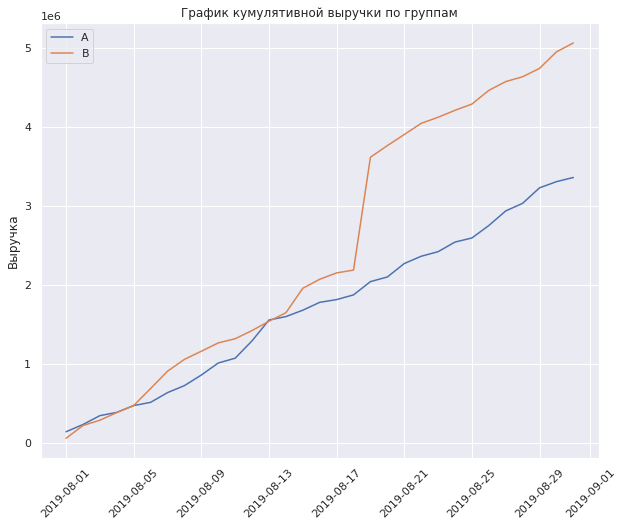

In [42]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('График кумулятивной выручки по группам')
plt.ylabel("Выручка")
plt.xticks(rotation=45)
plt.legend() 
plt.show()

**Вывод:**

Группа А растет линейно, а у группы В резкий скачек 17-18 числа, что может говорить о выбросе в данных.

### Построим график кумулятивного среднего чека по группам.

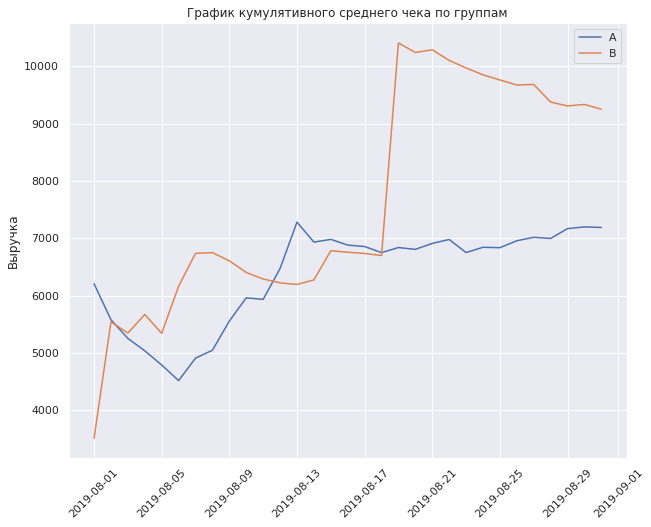

In [44]:
#построим график:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.ylabel("Выручка")
plt.xticks(rotation=45)
plt.legend()
plt.show()

**Вывод:**

Кумулятивное значение среднего чека по сегментам колеблется. Особенно заметен резкий скачок у группы В. Принимать решения по данной метрике рано и требуется анализ выбросов, которые сильно влияют на данные.

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

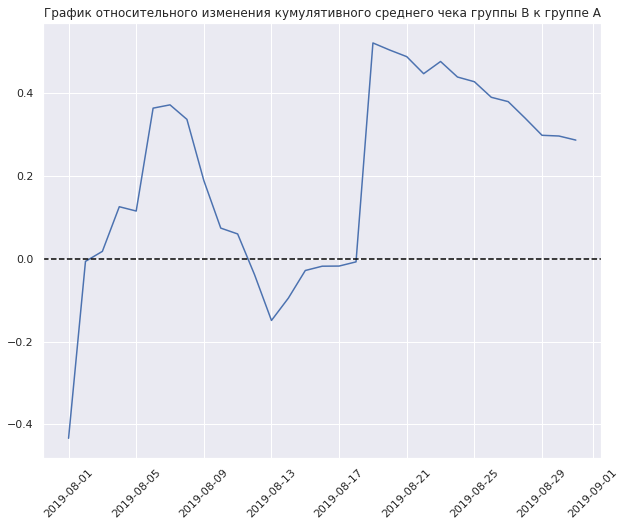

In [46]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B']
)

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'],
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 

plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xticks(rotation=45)
plt.show()

**Вывод**

Результаты теста значительно меняются в разные даты. Похоже, что именно в эти даты совершены аномальные заказы.

### Построим график кумулятивной конверсии по группам.

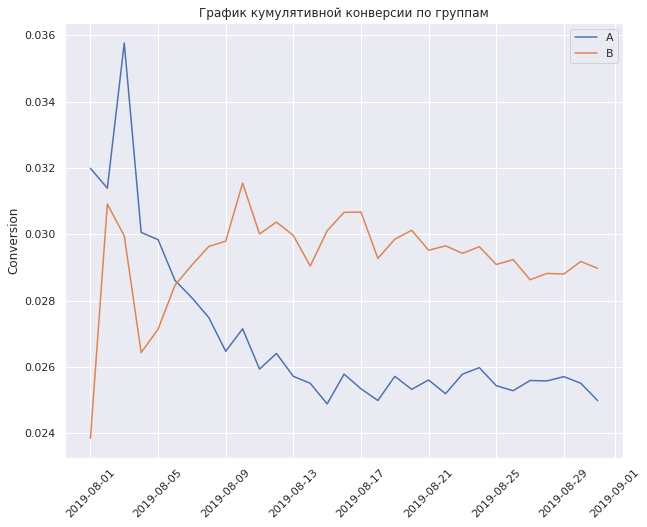

In [48]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('График кумулятивной конверсии по группам')
plt.ylabel('Conversion')
plt.xticks(rotation=45)
plt.legend()
plt.show()

**Вывод:**

У обеих групп наблюдается пик 2-3 числа, после чего у обеих групп идет резкое снижение. У группы А снижение более серьезное, в то время как у группы В показатели выглядят лучше. Однако, смотреть на предварительные результаты в первую неделю теста не стоит, так как группы эксперимента малы, и каждый новый пользователь сильно меняет картину, в последующие недели когда метрики начинают стабилизироваться, можно оценивать тренды, динамику и прочее.

### Построим график относительного изменения кумулятивной конверсии группы B к группе A.

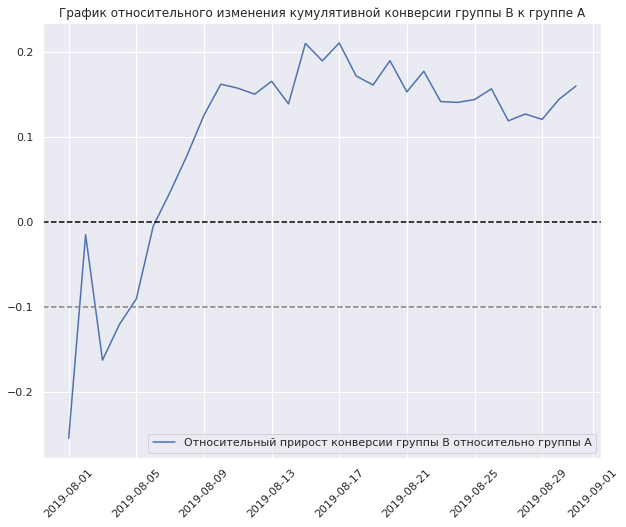

In [50]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(
    cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B']
)

plt.plot(
    mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/
    mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")

plt.legend()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xticks(rotation=45)
plt.show()

**Вывод:**

Конверсия группы В показывает себя намного лучше, достигая прироста до 20% относительно группы А.

### Построим точечный график количества заказов по пользователям.

In [51]:
#создадим таблицу по заказам:

orders_per_user = orders.groupby('visitor_id', as_index=False).agg({'transaction_id':pd.Series.nunique})\
                         .rename(columns={'transaction_id':'orders'})
orders_per_user.head()

,visitor_id,orders
0,5114589,1
1,6958315,1
2,11685486,1
3,39475350,1
4,47206413,1


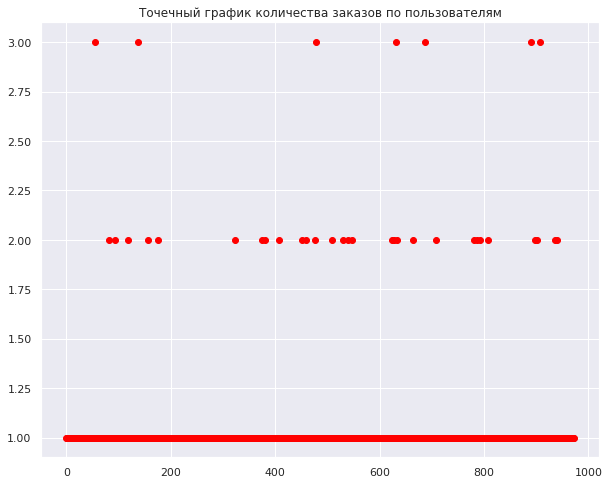

In [52]:
#построим график:

x_values = pd.Series(range(0,len(orders_per_user['orders'])))
plt.title('Точечный график количества заказов по пользователям')
plt.scatter(x_values, orders_per_user['orders'], color='red')
plt.show()

**Вывод:**

Как мы видим по графику, большая часть людей совершает покупку один раз, но есть те, кто совершают 2-3 покупки.

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя и выберем границу для определения аномальных пользователей.

In [53]:
print('90 перцентиль: %.2f' % (np.percentile(orders_per_user['orders'], [90])))
print('95 перцентиль: %.2f' % (np.percentile(orders_per_user['orders'], [95])))
print('99 перцентиль: %.2f' % (np.percentile(orders_per_user['orders'], [99])))

90 перцентиль: 1.00
95 перцентиль: 1.00
99 перцентиль: 2.00


In [54]:
#посмотрим максимальное значение числа покупок:

orders_per_user['orders'].max()

3

In [55]:
#посмотрим, сколько покупателей, выходящих за 99 процентиль, т.е. являющимися выбросами:

len(orders_per_user[orders_per_user['orders'] >= 2]['visitor_id'])

36

In [56]:
#добавим аномальные значения в список, они понадобятся нам дальше для дальнейшего исследования:

outlaws = orders_per_user[orders_per_user['orders'] >= 2]['visitor_id'].to_list()

**Вывод:**

Все значения за пределами 99 процентиля являются аномальными.

### Построим точечный график стоимостей заказов.

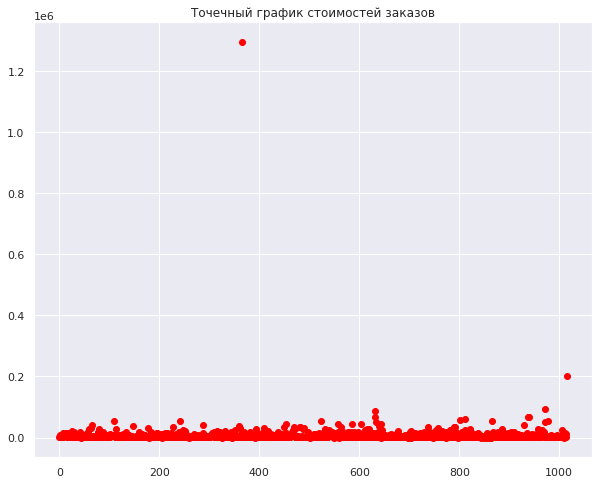

In [57]:
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.scatter(x_values, orders['revenue'], color='red')
plt.title('Точечный график стоимостей заказов');
plt.show()

**Вывод:**

На графике отчетливо видно 2 выброса. Это могут быть единичные заказы, совершенные какими-то предприятиями, которые закупали товр в очень болих объемах.

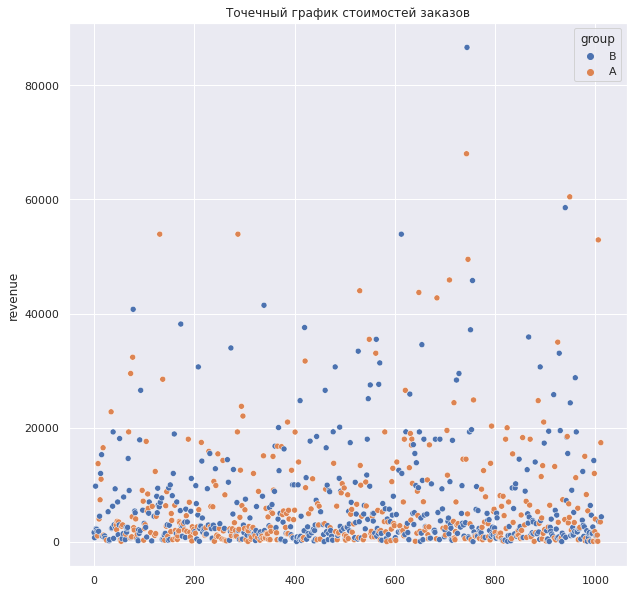

In [58]:
orders_clean = orders.query('revenue<200000')

x_values = pd.Series(range(0,orders_clean['revenue'].count()))
plt.figure(figsize=(10, 10))
sns.scatterplot(x=x_values, y="revenue", hue="group",
                     data=orders_clean)
plt.title('Точечный график стоимостей заказов');

### Посчитаем 95-й и 99-й перцентили стоимости заказов и выберем границу для определения аномальных заказов.

In [59]:
print('90 перцентиль: %.2f' % (np.percentile(orders['revenue'], [90])))
print('95 перцентиль: %.2f' % (np.percentile(orders['revenue'], [95])))
print('99 перцентиль: %.2f' % (np.percentile(orders['revenue'], [99])))

90 перцентиль: 17990.00
95 перцентиль: 26785.00
99 перцентиль: 53904.00


In [60]:
#посмотрим максимальную сумму выручки заказа:

orders['revenue'].max()

1294500

In [61]:
#посмотрим на медианное значение:

orders['revenue'].median()

2955.0

In [62]:
#посмотрим на этот заказ:

orders[orders['revenue'] == 1294500]

,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B


In [63]:
#посмотрим на историю заказов этого покупателя:

orders[orders['visitor_id'] == 1920142716]

,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B


**Вывод:**

Похоже, что это была единоразовая, но очень крупная покупка на сумму 1 294 500 денежных единиц, в то время как медианное значение составляет 2 955 единиц.

Все что за пределами 99 процентиля - является аномальными значениями.

Аномалиями по числу заказов являются более 2 заказов, а аномалиями по стоимости заказов единоразовые покупки в размере все, что больше 53 900.

### Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным.

In [67]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

cummulative = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

In [68]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                cummulative['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                cummulative['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Воспользуемся **критерием Манна-Уитни** для разности двух долей. Сформулируем гипотезы.

**H0:** Конверсия в группе A равна конверсии в группе B

**H1:** Конверсия в группе A не равна конверсии в группе B

In [69]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.011
0.160


Подтвердилась гипотеза, что конверсия в группе A не равна конверсии в группе B.

**Вывод**

Как мы видим, конверсия группы В действительно больше. Статистическая значимость присутствует.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

Воспользуемся критерием Манна-Уитни. Сформулируем гипотезы.

**H0:** Средний чек заказов для групп A и В совпадает

**H1:** Средний чек заказов для групп A и В различаются

In [70]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.829
0.287


In [71]:
# относительное различие средних
print("{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

# относительное различие медиан
print("{0:.3f}".format(orders[orders['group']=='B']['revenue'].median()/orders[orders['group']=='A']['revenue'].median()-1))

0.287
-0.062


**Вывод**

Средний чек группы В оказался больше. Но в данном случае мы не можем говорить о статистически-значимой разнице.

### Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным.

In [73]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)

#usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], [99])]['visitor_id']
usersWithExpensiveOrders = orders[orders['revenue'] > 53904]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

In [74]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                cummulative['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                cummulative['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

Воспользуемся **критерием Манна-Уитни** для разности двух долей. Сформулируем гипотезы.

**H0:** Конверсия в группе A равна конверсии в группе B

**H1:** Конверсия в группе A не равна конверсии в группе B

In [75]:
print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.007
0.189


**Вывод:**

В отчищенных данных конверсия группы В снова превышает конверсию группы А со стататистической значимостью.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

Воспользуемся критерием Манна-Уитни. Сформулируем гипотезы.

**H0:** Средний чек заказов для групп A и В совпадает

**H1:** Средний чек заказов для групп A и В различаются

In [77]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.788
-0.032


**Вывод:**

0.321 это явно больше, чем уровень значимости, значит статистически значимых отличий нет (Н0 не отвергается)

## Решение по результатам теста.

**Новый вывод**

Данный тест можно остановить и считать успешно проведенным. 

Конверсия из пользователя в покупателя у группы B статистически значимо выше, чем у группы A. При этом средний чек между группами не отличается.

Помимо этого, в процессе работы с данными было выяснено, что некоторые пользователи от сессии к сессии могли видеть как одну версию сайта, так и другую, что нарушает один из основных принцип работы A/B-теста - один пользователь видит только одну версию на всём протяжении теста.

В связи с этим, нам необходимо проверить корректность отработки метода показа пользователям одной или другой версии сайта и поправить его, чтобы одному и тому же пользователю показывалась только та версия сайта, которую он увидел при первом визите.